In [2]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score


# model opitmization
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# time - test
import time

# math 
from math import sqrt

# statistical models 
import statsmodels.api as sm

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.preprocessing import StandardScaler

In [3]:
notebook_start_time = time.time()

## 1. HR Analytics

### 1.1 Load and Sample the data

In [4]:
df_hr = pd.read_csv('./hr_csv_transformed.csv')

In [5]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        9092 non-null   int64  
 1   education                     9092 non-null   int64  
 2   no_of_trainings               9092 non-null   float64
 3   age                           9092 non-null   float64
 4   previous_year_rating          9092 non-null   float64
 5   length_of_service             9092 non-null   float64
 6   KPIs_met >80%                 9092 non-null   int64  
 7   awards_won?                   9092 non-null   int64  
 8   avg_training_score            9092 non-null   float64
 9   is_promoted                   9092 non-null   int64  
 10  department_Sales & Marketing  9092 non-null   int64  
 11  department_Operations         9092 non-null   int64  
 12  department_Technology         9092 non-null   int64  
 13  dep

In [6]:
df_hr.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
0,6108,1,2.0,-0.103865,0.0,-0.503161,0,0,-0.12,0,...,0,0,0,0,0,0,1,0,1,0
1,785,1,1.0,-0.677333,-2.0,-0.225465,0,0,1.04,0,...,0,0,0,0,0,0,1,0,1,0
2,1234,2,0.0,-0.321705,1.0,-0.864038,1,0,-0.44,0,...,0,0,0,0,0,0,1,0,1,0
3,6108,1,0.0,-0.436134,1.0,-0.864038,0,0,-0.08,0,...,0,0,1,0,0,0,1,1,0,0
4,1701,2,0.0,0.732668,-2.0,0.740418,0,0,-0.20,0,...,0,0,0,0,0,1,0,1,0,0


In [7]:
df_hr.describe()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,4584.995381,1.290805,0.231522,0.107887,0.583150,-0.043580,0.512868,0.064452,0.283836,0.500000,...,0.015178,0.140013,0.044435,0.036846,0.017268,0.315662,0.684338,0.429059,0.545535,0.025407
std,4079.802512,0.483942,0.559087,0.671022,1.182599,0.699312,0.499862,0.245570,0.579979,0.500027,...,0.122268,0.347020,0.206070,0.188393,0.130275,0.464805,0.464805,0.494969,0.497950,0.157366
min,31.000000,0.000000,0.000000,-1.690290,-2.000000,-1.378193,0.000000,0.000000,-0.760000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1234.000000,1.000000,0.000000,-0.436134,0.000000,-0.503161,0.000000,0.000000,-0.240000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2617.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.160000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6108.000000,2.000000,0.000000,0.476189,2.000000,0.496839,1.000000,0.000000,0.810000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11497.000000,2.000000,7.000000,2.017907,2.000000,2.115994,1.000000,1.000000,1.560000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_hr.isnull().sum()

region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Sales & Marketing    0
department_Operations           0
department_Technology           0
department_Analytics            0
department_R&D                  0
department_Procurement          0
department_Finance              0
department_HR                   0
department_Legal                0
gender_f                        0
gender_m                        0
recruitment_channel_sourcing    0
recruitment_channel_other       0
recruitment_channel_referred    0
dtype: int64

In [9]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

0    4546
1    4546
Name: is_promoted, dtype: int64

### 1.1.1 Train and Test splits 

In [10]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.1.2 Feature Importances 

In [10]:
# using logit - for classification 
lgsm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.429350
         Iterations 7


In [11]:
lgsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6364
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                           20
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.3806
Time:                        19:51:58   Log-Likelihood:                -2732.4
converged:                       True   LL-Null:                       -4411.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                        6.851e-06   8.88e-06      0.772      0.440   -1.06e-05    2.43e-05
education                        0.1445      0.079      1.818      0.069      -0.011       0.300
no_of_trainings                 -0.0403      0.062     -0.655      0.513      -0.161       0.080
age                             -0.3805      0.073     -5.199      0.000      -0.524      -0.237
previous_year_rating             0.2490      0.031      8.137      0.000       0.189       0.309
length_of_service                0.1946      0.063      3.086      0.002       0.071       0.318
KPIs_met >80%                    2.6255      0.084     31.276      0.000       2.461       2.790
awards_won?                      1.9333      0.210      9.198      0.000       1.521       2.345
avg_training_score               7.2899      0.233     31.287      0.000       6.833       7.747
department_Sales & Marketing     4.2095        nan        nan        nan         nan         nan
department_Operations            1.3355        nan        nan        nan         nan         nan
department_Technology           -3.8352        nan        nan        nan         nan         nan
department_Analytics            -5.3134        nan        nan        nan         nan         nan
department_R&D                  -5.6380        nan        nan        nan         nan         nan
department_Procurement          -1.3390        nan        nan        nan         nan         nan
department_Finance               1.3003        nan        nan        nan         nan         nan
department_HR                    3.7919        nan        nan        nan         nan         nan
department_Legal                 1.0080        nan        nan        nan         nan         nan
gender_f                        -2.2522    1.2e+06  -1.87e-06      1.000   -2.36e+06    2.36e+06
gender_m                        -2.2282    1.2e+06  -1.85e-06      1.000   -2.36e+06    2.36e+06
recruitment_channel_sourcing    -1.5920        nan        nan        nan         nan         nan
recruitment_channel_other       -1.4742        nan        nan        nan         nan         nan
recruitment_channel_referred    -1.4141        nan        nan        nan         nan         nan
================================================================================================
"""

### 1.1.3 Scaling

In [12]:
def print_variable_scale(dataframe, variable_name):
    if variable_name not in dataframe.columns:
        print(f"Variable '{variable_name}' not found in the DataFrame.")
        return

    variable_data = dataframe[variable_name]

    variable_range = variable_data.max() - variable_data.min()

    print(f"{variable_name} : {variable_range}")

In [13]:
for n in X_train.columns : 
    print_variable_scale(X_train,n)
    
# does this mean i need to scale everything? 

region : 11466
education : 2
no_of_trainings : 7.0
age : 3.7081979384931767
previous_year_rating : 4.0
length_of_service : 3.49418744314342
KPIs_met >80% : 1
awards_won? : 1
avg_training_score : 2.3200000000000003
department_Sales & Marketing : 1
department_Operations : 1
department_Technology : 1
department_Analytics : 1
department_R&D : 1
department_Procurement : 1
department_Finance : 1
department_HR : 1
department_Legal : 1
gender_f : 1
gender_m : 1
recruitment_channel_sourcing : 1
recruitment_channel_other : 1
recruitment_channel_referred : 1


### 1.2 Build the Model(s)

In [14]:
models = []

model_names = []

In [15]:
# no hyperparams except random state for consistency in results 
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

models.append(lg)
model_names.append("Logistic Regression")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# decision tree classifier 
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

models.append(dtree)
model_names.append("Decision Tree")

In [17]:
# random forest classifier 
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

models.append(rf)
model_names.append("Random Forest")

In [18]:
# support vector machine 
svc = SVC(random_state = 42).fit(X_train,y_train)

models.append(svc)
model_names.append("SVC")

In [19]:
# multi layer perceptron
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

models.append(mlp)
model_names.append("Multi Layer Perceptron")

In [20]:
# adaptive boosting
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)

models.append(ada)
model_names.append("ADA")

In [21]:
# extreme gradient boosting 
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

models.append(xgb)
model_names.append("XGB")

### 1.2.1 Consolidated View of Model Scores

In [22]:
scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

,Model,Train Score,Test Score
0,Logistic Regression,0.728787,0.720674
1,Decision Tree,1.000000,0.749267
2,Random Forest,1.000000,0.793622
3,SVC,0.533941,0.537023
4,Multi Layer Perceptron,0.663891,0.668622
5,ADA,0.782055,0.769428
6,XGB,0.933532,0.799487


### 1.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Classifier</mark>, <mark>Multi Layer Perceptron (Artificial Neural Network)</mark>,<mark>ADA Boost (Ensemble Model)</mark>.

In [23]:
def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    # Training scores and report
    train_pred = model.predict(X_train)
    print('\nTraining report:')
    print(classification_report(y_train, train_pred))

    # Testing scores and report
    test_pred = model.predict(X_test)
    print('\nTesting report:')
    print(classification_report(y_test, test_pred))

    # Confusion matrix for training
    print('\nConfusion Matrix:')
    train_cm = confusion_matrix(y_train, train_pred)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training')

    # Confusion matrix for testing
    plt.subplot(1, 2, 2)
    test_cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')

    plt.tight_layout()
    plt.show()

### 1.3.1 Model 1 (random forest classifier) 

Model: RandomForestClassifier(random_state=42)

Training score: 1.0
Testing score: 0.7936217008797654

Training report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3157
           1       1.00      1.00      1.00      3207

    accuracy                           1.00      6364
   macro avg       1.00      1.00      1.00      6364
weighted avg       1.00      1.00      1.00      6364


Testing report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1389
           1       0.75      0.87      0.80      1339

    accuracy                           0.79      2728
   macro avg       0.80      0.79      0.79      2728
weighted avg       0.80      0.79      0.79      2728


Confusion Matrix:


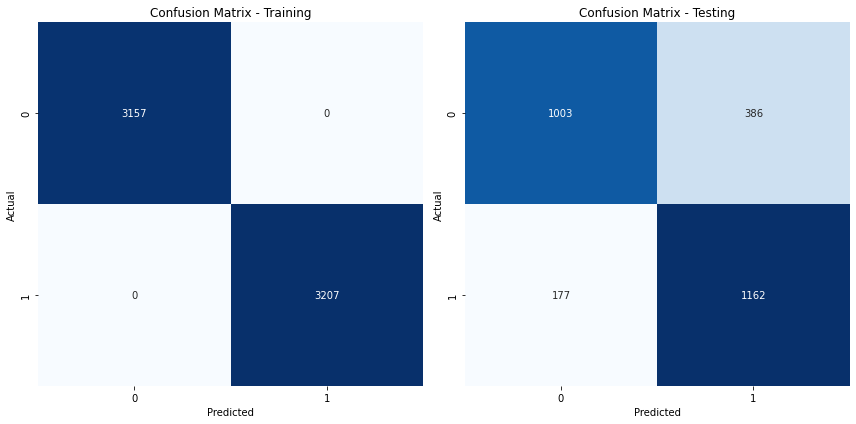

In [24]:
model_scores_classification(rf)

##### comments 
- the model scores are very overfitted which need to be tuned
- high variance and low bias, the model is performing well on training set but not as good on training set, meaning it is putting in close attention to the train set
- it is this way due to the 'nature' of random forest

### 1.3.1.1 Hyperparameter Inspection
##### hyperparams to be tweaked or that can be tweaked 
- <mark>n_estimators</mark> : number of trees
- <mark>criterion</mark> : quality of split
- <mark>max_depth</mark> : depth of tree, if there are too many details it might lead to overfitting? affected by:min_samples_split samples
- <mark>min_samples_split</mark> : number of samples required to split an internal node 
- <mark>min_samples_leaf</mark> : number of samples required to become a leaf? makes model more generalised (add later on?) 
- <mark>max_features</mark> : number of features to consider for a best split 

### 1.3.1.1 (a)  n_estimators

##### n_estimators vs. train and test scores  (range : 100-1000)

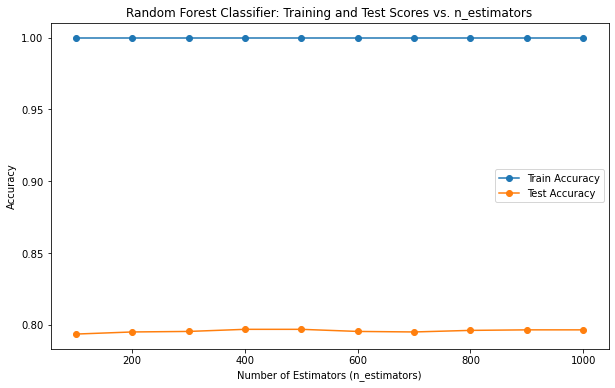

In [25]:
n_estimators_values = np.arange(100,1100,100)

# Initialize lists to store training and test scores
train_scores = []
test_scores = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores and store them
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test Accuracy', marker='o')
plt.title('Random Forest Classifier: Training and Test Scores vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Generate some sample data or load your own dataset
# X, y = ...

# Specify the range of max_depth values to be tested
max_depth_values = np.arange(1,100, 1)

# Initialize empty lists to store the mean cross-validation scores
train_scores = []
test_scores = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create a Random Forest Classifier with the current max_depth
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42)

    # Compute cross-validation scores for training and testing sets
    train_score = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
    test_score = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

    # Append the scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train Score', marker='o')
plt.plot(max_depth_values, test_scores, label='Test Score', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Classifier Cross-Validation Scores vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

### 1.3.1.1 (b) max_depth 

##### max depth vs accuracy (range: 2-20), we start lower 

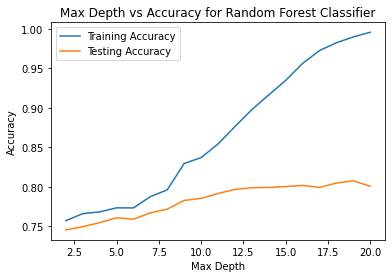

In [26]:
max_depths = np.arange(2, 21,1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth in max_depths:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

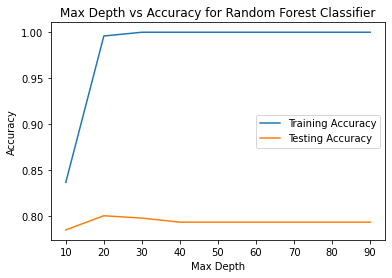

In [27]:
max_depths = np.arange(10, 100,10)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth in max_depths:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

### 1.3.1.1 (c) min_samples_split

##### min samples vs accuracy (range: 2-100), start from default 

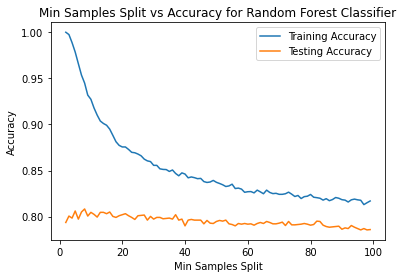

In [28]:
min_samples_splits = np.arange(2, 100, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# overfitting gets reduced, but test scores typically dont increase
# reduced overfitting but it compromises train scores

##### min samples vs accuracy (range: 100-1000), see higher to see effect

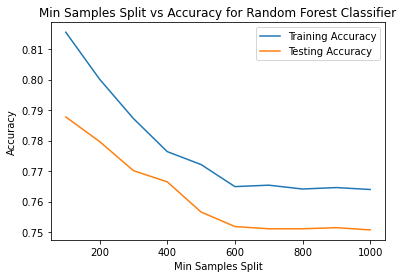

In [29]:
min_samples_splits = np.arange(100, 1100, 100)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# too many samples makes the model become worse

### 1.3.1.1 (d) min_samples_leaf 

##### min samples leaf vs accuracy (range: 2-20), start from default

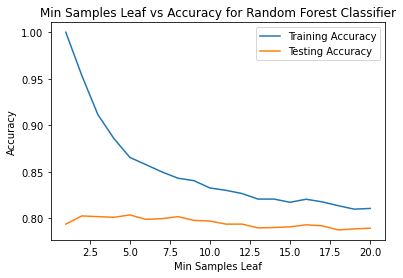

In [30]:
min_samples_leafs = np.arange(1, 21, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leafs:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_leafs, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_leafs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Min Samples Leaf vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# doing so reduces overfitting

### 1.3.1.2 Optimizing Hyperparameters

### 1.3.1.2 (a) GridSearchCV 

In [42]:
param_grid = {'criterion' : ['gini','entropy'],
              'n_estimators' : [400],
              'max_depth' : [10],
              'min_samples_split' : [100],
              'min_samples_leaf': [20]}

In [43]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=100, n_estimators=400;, score=0.775 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=100, n_estimators=400;, score=0.792 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=100, n_estimators=400;, score=0.782 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=100, n_estimators=400;, score=0.779 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=100, n_estimators=400;, score=0.786 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=100, n_estimators=400;, score=0.774 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=20, min_samples_split=100, n_estimators=400;, score=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\joblib\pa

In [44]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7826843933263178
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 100, 'n_estimators': 400}
Elapsed Time: 00:16


Model: RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=100,
                       n_estimators=400, random_state=42)

Training score: 0.7955688246385921
Testing score: 0.7752932551319648

Training report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.77      3157
           1       0.74      0.92      0.82      3207

    accuracy                           0.80      6364
   macro avg       0.81      0.79      0.79      6364
weighted avg       0.81      0.80      0.79      6364


Testing report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1389
           1       0.71      0.90      0.80      1339

    accuracy                           0.78      2728
   macro avg       0.79      0.78      0.77      2728
weighted avg       0.80      0.78      0.77      2728


Confusion Matrix:


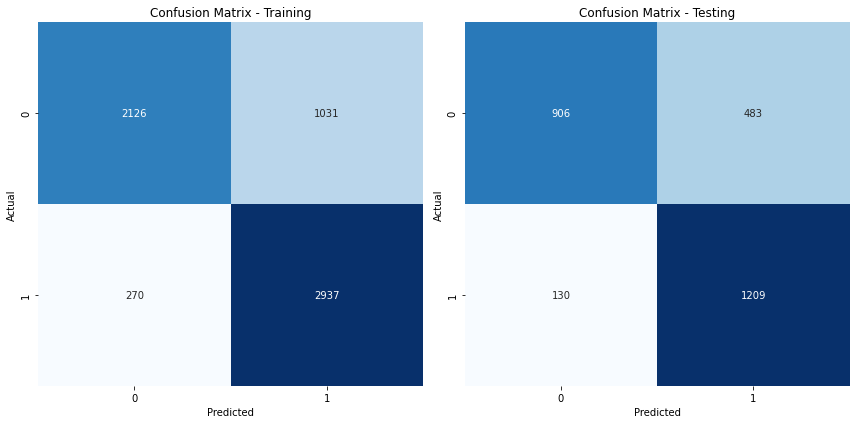

In [46]:
rf2 = RandomForestClassifier(criterion = 'gini',
                             n_estimators = 400,
                             max_depth = 10,
                             min_samples_split=100,
                             min_samples_leaf=20,
                             random_state=42).fit(X_train,y_train)

model_scores_classification(rf2)

##### 1st Iteration  

In [ ]:
param_grid = {'n_estimators' : [40,50,60,70], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['gini','entropy'],
              'max_depth' : [10,20,30],
              'min_samples_split':[60,80,100],
              'min_samples_leaf':[10,15,20]}# where the model tends to be the best at lower depths

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
rf2 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=10
                             ,min_samples_split=60,n_estimators=70,random_state=42).fit(X_train,y_train)

model_scores_classification(rf2)

# reduced overfitting, but the test scores went lower 

##### 2nd iteration - set it at a higher range for all params to try to increase accuracy 

In [ ]:
param_grid = {'n_estimators' : [100,200,300], 
              'criterion' : ['gini','entropy'],
              'max_depth' : [30,50,70],
              'min_samples_split':[100,200,300],
              'min_samples_leaf':[30,50,70]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
rf3 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=30
                             ,min_samples_split=100,n_estimators=100,random_state=42).fit(X_train,y_train)

model_scores_classification(rf3)

# overfitting is reduced but accuracies slightly decrease
# lower params are better accuracies

##### 3rd iteration - added class weights to 1st iteration

In [ ]:
param_grid = {'n_estimators' : [40,50,60,70], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['gini','entropy'],
              'max_depth' : [10,20,30],
              'min_samples_split':[60,80,100],
              'min_samples_leaf':[10,15,20],
              'class_Weights' : ['balanced','balanced_subsample']}

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

### 1.3.2 Model 2 (MLP) 

In [ ]:
model_scores_classification(mlp)

### 1.3.2.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>hidden_layer_sizes</mark> : number of neurons in the hidden layer 
- <mark>activation</mark> : activation or squashing function for the hidden layer 
- <mark>solver</mark> : solver for weight optimization 
- <mark>max_iter</mark> : maximum number of iterations 
- <mark>alpha</mark> : regularisation term 

### 1.3.2.1 (a) hidden_layer_sizes

##### hidden layer sizes (brain size) against train and test

In [ ]:
hidden_layer_sizes = [(i,) for i in range(100, 610, 100)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
hidden_layer_sizes = [(i,) for i in range(10, 110, 10)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### 1.3.2.1 (b) max_iter 

##### max_iter against accuracies (range : 100-1000)

In [ ]:
max_iters = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

In [ ]:
max_iters = [i for i in range(100, 1000, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

# scores tend to plateau at a high number of iterations

##### max_iter and solvers vs train score 

In [ ]:
max_iters = [i for i in range(10, 110, 10)]
solvers = ['lbfgs', 'sgd', 'adam']

# Create a dictionary to store training scores for each solver
train_scores = {solver: [] for solver in solvers}

# Train MLP models with different max_iter values and solvers
for solver in solvers:
    for max_iter in max_iters:
        model = MLPClassifier(max_iter=max_iter, solver=solver, random_state=42)
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate accuracy on the training set
        train_accurbacy = model.score(X_train, y_train)
        train_scores[solver].append(train_accuracy)

# Plotting the graph for different solvers
for solver in solvers:
    plt.plot(max_iters, train_scores[solver], marker='o', label=f'Train Set ({solver} solver)')

plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Training Accuracy for MLP Model (Different Solvers)')
plt.legend()
plt.show()

# according to documentation, 'lbfgs' solver is better for smaller and lesser complex datasets
# warnings show here that the model is not converging, it might need alot more iterations for it to converge as
# compared to other solvers

In [ ]:
max_iters = [i for i in range(100, 1100, 100)]
solvers = ['lbfgs', 'sgd', 'adam']

# Create a dictionary to store training scores for each solver
train_scores = {solver: [] for solver in solvers}

# Train MLP models with different max_iter values and solvers
for solver in solvers:
    for max_iter in max_iters:
        model = MLPClassifier(max_iter=max_iter, solver=solver, random_state=42)
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate accuracy on the training set
        train_accurbacy = model.score(X_train, y_train)
        train_scores[solver].append(train_accuracy)

# Plotting the graph for different solvers
for solver in solvers:
    plt.plot(max_iters, train_scores[solver], marker='o', label=f'Train Set ({solver} solver)')

plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Training Accuracy for MLP Model (Different Solvers)')
plt.legend()
plt.show()

# according to documentation, 'lbfgs' solver is better for smaller and lesser complex datasets
# warnings show here that the model is not converging, it might need alot more iterations for it to converge as
# compared to other solvers
# sometimes the model does not converge for other solvers as well 

### 1.3.2.2 Optimizing Hyperparameters 

### 1.3.2.2 (a) GridSearchCV

In [ ]:
mlp_models = [mlp]
mlp_names = ['base']

##### 1st iteration - low set of max_iter

In [ ]:
param_grid = {'hidden_layer_sizes' : [(50,),(100,),(200,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [40,50,60]} # start with a lower set of iterations 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp2 = MLPClassifier(activation='relu',hidden_layer_sizes=(100,),max_iter = 50,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp2)
mlp_models.append(mlp2)
mlp_names.append('mlp2 - low iterations')


# no change in scores, we need to try to increase it 

##### 2nd iteration - higher iterations 
- in the previous search, we used relatively large number neurons with little iterations, which might be why the scores are not as optimal

In [ ]:
param_grid = {'hidden_layer_sizes' : [(50,),(100,),(200,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [100,200,300]} # more iterations for the model to learn? 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp3 = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,),max_iter = 200
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp3)
mlp_models.append(mlp3)
mlp_names.append('mlp3 - higher iterations')

# scores increase with close f1 scores

##### 3rd iteration - trying higher layers and higher iterations 
- for the model to learn better 

In [ ]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,),(400,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [500,700,1000]} # more iterations for the model to learn? 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp4 = MLPClassifier(activation='logistic',hidden_layer_sizes=(300,),max_iter = 500
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp4)
mlp_models.append(mlp4)
mlp_names.append('mlp4 - higher iterations,layers')

# train score remained the same 
# test score decreased
# how to improve test score?  

##### 4th iteration - add regularisation parameter 
- to reduce overfitting, we try to implement regularization (alpha) 
- instead of using gridsearch, we see the effect of regularization for the specific model mlp2 (previously optimized) 

In [ ]:
alphas = np.logspace(-6, 3, 10)

# Calculate training and test scores at different alpha values
train_scores, test_scores = validation_curve(
    mlp4, X_train, y_train, param_name='alpha', param_range=alphas, cv=5, scoring='accuracy'
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, np.mean(train_scores, axis=1), label='Training score', marker='o')
plt.semilogx(alphas, np.mean(test_scores, axis=1), label='Cross-validation score', marker='o')
plt.title('Validation Curve for MLPClassifier')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mlp5 = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,),max_iter = 200
                     ,solver='adam',alpha=0.0001,random_state=42).fit(X_train,y_train)

model_scores_classification(mlp5)
mlp_models.append(mlp5)
mlp_names.append('mlp5 - regularisation added')

# no change in scores 

### 1.3.3.3 'optimized' models

In [ ]:
scores_table = []
for model, name in zip(mlp_models, mlp_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores_mlp = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores_mlp

### 1.3.3 Model 3 (ADA)

### 1.3.3.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>estimator</mark> : we can use the previous models
- <mark>n_estimators</mark> : number of estimators 
- <mark>learning_rate</mark> : learning rate, weight applied at each iteration 
- <mark>algorithm</mark> : algorithm 

### 1.3.3.1 (a) n_estimators 

##### n_estimators against model accuracies 

In [ ]:
estimators = [i for i in range(100, 1100, 10)]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different n_estimators values
for n_estimators in estimators:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(estimators, train_accuracies,label='Train Set')
plt.plot(estimators, test_accuracies,label='Test Set')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Number of Estimators vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

# scores tend to see increases for the train set, but for the test set it is inconsistent 
# we can try to strike a balance for it 

### 1.3.3.1 (b) learning_rate

###### learning rate against model accuracies 

In [ ]:
learning_rates = [0.01, 0.1, 0.5, 1.0]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different learning rates
for learning_rate in learning_rates:
    model = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(learning_rates, train_accuracies, marker='o', label='Train Set')
plt.plot(learning_rates, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

### 1.3.3.2 Optimizing Hyperparameters 

### 1.3.3.2 (a) GridSearchCV 

##### 1st iteration - lower estimators

In [ ]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.6,0.8,1],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada2 = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=300,random_state=42).fit(X_train,y_train)

model_scores_classification(ada2)

# train and test scores increase but is slightly overfit

##### 2nd iteration - lower learning rate 
- high learning rates tend to lead to overfitting 

In [ ]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada3  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=400,random_state=42).fit(X_train,y_train)

model_scores_classification(ada3)

# overfitting is reduced 

##### 3rd iteration - use lower number of estimators 
- higher estimators leads to overfitting due to complexity? (confirm this)

In [ ]:
param_grid = {'n_estimators' : [50,100,200],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada4  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=200,random_state=42).fit(X_train,y_train)

model_scores_classification(ada4)

# lower iterations leads test score to be lower? 

## 2. Airbnb

In [ ]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score


# model opitmization
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# time - test
import time

# math 
from math import sqrt

# statistical models 
import statsmodels.api as sm

# regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# scaling 
from sklearn.preprocessing import StandardScaler

### 2.1 Load and Sample the data

In [ ]:
df_bnb = pd.read_csv('./bnb_transformed.csv')

In [ ]:
df_bnb.info()

In [ ]:
df_bnb.head()

In [ ]:
df_bnb.isnull().sum()

In [ ]:
df_bnb.describe()

### 2.1.1 Train and Test Splits 

In [ ]:
X = df_bnb.drop(['price'], axis =1)
y = df_bnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.1.2 Feature Importances

In [ ]:
# using OLS model to see the p-values and coefficients 
ols = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
ols.summary()

In [ ]:
# choose which features to drop in train and test 

columns_to_drop = ['apartment', 'apt', 'bed', 'bedroom', 'br', 'central', 'city', 'condo', 'cosy', 'cozy', 
                   'mins', 'near', 'orchard', 'room', 'studio','longitude','latitude']

X_train = X_train.drop(columns=columns_to_drop)

X_test = X_test.drop(columns=columns_to_drop)

In [ ]:
X_train.info()

### 2.1.3 Scaling

In [ ]:
def print_variable_scale(dataframe, variable_name):
    if variable_name not in dataframe.columns:
        print(f"Variable '{variable_name}' not found in the DataFrame.")
        return

    variable_data = dataframe[variable_name]

    variable_range = variable_data.max() - variable_data.min()

    print(f"{variable_name} : {variable_range}")

In [ ]:
for n in X_train.columns : 
    print_variable_scale(X_train,n)

In [ ]:
# experiment scaling all cols 
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on x_train and x_test copies
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_copy), columns=X_train_copy.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_copy), columns=X_test_copy.columns)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['host_id'], ax=ax1, label='host_id')
sns.kdeplot(X_train['neighbourhood'], ax=ax1, label='neighbourhood')
sns.kdeplot(X_train['room_type'], ax=ax1, label='room_type')
sns.kdeplot(X_train['minimum_nights'], ax=ax1, label='minimum_nights')
sns.kdeplot(X_train['number_of_reviews'], ax=ax1, label='number_of_reviews')
sns.kdeplot(X_train['reviews_per_month'], ax=ax1, label='reviews_per_month')
sns.kdeplot(X_train['calculated_host_listings_count'], ax=ax1, label='calculated_host_listings_count')
sns.kdeplot(X_train['availability_365'], ax=ax1, label='availability_365')
sns.kdeplot(X_train['last_review_year'], ax=ax1, label='last_review_year')
sns.kdeplot(X_train['last_review_month'], ax=ax1, label='last_review_month')
sns.kdeplot(X_train['last_review_day'], ax=ax1, label='last_review_day')
sns.kdeplot(X_train['mrt'], ax=ax1, label='mrt')
sns.kdeplot(X_train['private'], ax=ax1, label='private')
sns.kdeplot(X_train['spacious'], ax=ax1, label='spacious')

ax1.legend()

# Plot after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['host_id'], ax=ax2, label='host_id')
sns.kdeplot(X_train_scaled['neighbourhood'], ax=ax2, label='neighbourhood')
sns.kdeplot(X_train_scaled['room_type'], ax=ax2, label='room_type')
sns.kdeplot(X_train_scaled['minimum_nights'], ax=ax2, label='minimum_nights')
sns.kdeplot(X_train_scaled['number_of_reviews'], ax=ax2, label='number_of_reviews')
sns.kdeplot(X_train_scaled['reviews_per_month'], ax=ax2, label='reviews_per_month')
sns.kdeplot(X_train_scaled['calculated_host_listings_count'], ax=ax2, label='calculated_host_listings_count')
sns.kdeplot(X_train_scaled['availability_365'], ax=ax2, label='availability_365')
sns.kdeplot(X_train_scaled['last_review_year'], ax=ax2, label='last_review_year')
sns.kdeplot(X_train_scaled['last_review_month'], ax=ax2, label='last_review_month')
sns.kdeplot(X_train_scaled['last_review_day'], ax=ax2, label='last_review_day')
sns.kdeplot(X_train_scaled['mrt'], ax=ax2, label='mrt')
sns.kdeplot(X_train_scaled['private'], ax=ax2, label='private')
sns.kdeplot(X_train_scaled['spacious'], ax=ax2, label='spacious')

ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# experiment if x_train is scaled 
X_train = X_train_scaled
X_test = X_test_scaled

### 2.2 Build the Model(s)

In [ ]:
models = []

model_names = []

In [ ]:
# linear regression
lr = LinearRegression().fit(X_train,y_train)

models.append(lr)
model_names.append('LinearRegression')

In [ ]:
# decision tree regressor
dtr = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

models.append(dtr)
model_names.append('DTree Regressor')

In [ ]:
# random forest regressor 
rfr = RandomForestRegressor(random_state=42).fit(X_train, y_train)

models.append(rfr)
model_names.append('Random Forest Regressor')

In [ ]:
# SVR
svr = SVR().fit(X_train, y_train)

models.append(svr)
model_names.append('SVR')

In [ ]:
# adaptive boosting 
ada_r = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

models.append(ada_r)
model_names.append('ADA Boost')

In [ ]:
# XGB
xgb_r = XGBRegressor(random_state=42).fit(X_train, y_train)

models.append(xgb_r)
model_names.append('XG Boost')

In [ ]:
# multilayer perceptron
mlp_r = MLPRegressor(random_state=42).fit(X_train,y_train)

models.append(mlp_r)
model_names.append('Multilayer Perceptron')

### 2.2.1 Consolidated View of Model Accuracies 

In [ ]:
results = []

for model, model_name in zip(models, model_names):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Calculate metrics
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

### 2.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Regressor</mark>, <mark>SVR</mark>,<mark>XG Boost</mark>.

In [ ]:
def model_scores_regression(model):
    print(f"Model : {model}:\n")
    # Predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Predictions on the testing set
    y_test_pred = model.predict(X_test)
    
    # Calculated the RMSE and R^2 for training set
    print('R-Square:')
    print(model.score(X_train, y_train), '(Train R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    print(model.score(X_test, y_test), '(Test R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    
    # Create subplot for training set
    plt.figure(figsize=(12, 5))  # Adjust the figure size
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Actual vs. Predicted (Training)')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Training Set: Fitted against Predicted Plot")
    plt.legend()
    
    print()
    
    print('RMSE:')
    # Calculated the RMSE and R^2 for testing set
    print(sqrt(mean_squared_error(y_train_pred, y_train)), '(Train RMSE)')  # RMSE: the lower the better
    print(sqrt(mean_squared_error(y_test_pred, y_test)), '(Test RMSE)')  # RMSE: the lower the better
    
    # Create subplot for testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, label='Actual vs. Predicted (Testing)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Testing Set: Fitted against Predicted Plot")
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

### 2.3.1 Model 1 (Random Forest Regressor) 

In [ ]:
model_scores_regression(rfr)
# the model is very overfitted 

### 2.3.1.1 Hyperparameter Inspection 
- <mark>n_estimators</mark> : number of trees
- <mark>criterion</mark> : quality of split
- <mark>max_depth</mark> : depth of tree, if there are too many details it might lead to overfitting? affected by:min_samples_split samples
- <mark>min_samples_split</mark> : number of samples required to split an internal node 
- <mark>min_samples_leaf</mark> : number of samples required to become a leaf? makes model more generalised (add later on?) 
- <mark>max_features</mark> : number of features to consider for a best split 

### 2.3.1.1 (a) n_estimators

##### n_estimators vs. rsq (range: 10-100)

In [ ]:
n_estimators_values = np.arange(10, 110, 10)

# Lists to store train and test scores
train_scores = []
test_scores = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Calculate and store train and test scores (using R-squared)
    train_scores.append(rf_regressor.score(X_train, y_train))
    test_scores.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# train score is so high - why? 

##### n_estimators vs rsq (range: 100-1000)
- more estimators might make the model more complex

In [ ]:
n_estimators_values = np.arange(100, 1100, 100)

# Lists to store train and test scores
train_scores = []
test_scores = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Calculate and store train and test scores (using R-squared)
    train_scores.append(rf_regressor.score(X_train, y_train))
    test_scores.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# the values tend to plateau as we go higher
# need to either reduce the train score or increase the test score

### 2.3.1.1 (b) max_depth

##### max_depth - cross val accuracy

In [ ]:
max_depth_values = np.arange(10, 100,10)

# Lists to store cross-validated R-squared values for both training and testing
train_cross_val_rsq_values = []
test_cross_val_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Calculate cross-validated R-squared values for training set
    train_cross_val_rsq = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
    
    # Calculate cross-validated R-squared values for testing set
    test_cross_val_rsq = cross_val_score(rf_regressor, X_test, y_test, cv=5, scoring='r2')
    
    # Store the mean of cross-validated R-squared values for both training and testing sets
    train_cross_val_rsq_values.append(np.mean(train_cross_val_rsq))
    test_cross_val_rsq_values.append(np.mean(test_cross_val_rsq))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_cross_val_rsq_values, label='Train Cross-Validated R-squared', marker='o')
plt.plot(max_depth_values, test_cross_val_rsq_values, label='Test Cross-Validated R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

##### max_depth vs train and test rsq

In [ ]:
max_depth_values = np.arange(10, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq = r2_score(y_train, rf_regressor.predict(X_train))
    train_rsq_values.append(train_rsq)
    
    # Calculate R-squared values for testing set
    test_rsq = r2_score(y_test, rf_regressor.predict(X_test))
    test_rsq_values.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(max_depth_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

In [ ]:
max_depth_values = np.arange(10, 110,10)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq = r2_score(y_train, rf_regressor.predict(X_train))
    train_rsq_values.append(train_rsq)
    
    # Calculate R-squared values for testing set
    test_rsq = r2_score(y_test, rf_regressor.predict(X_test))
    test_rsq_values.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(max_depth_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# plateaus at around here

### 2.3.1.1 (c) min_samples_split
- can help to reduce overfitting 


###### min samples vs rsq (range: 2-21)

In [ ]:
min_samples_split_values = np.arange(2, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_split_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# more splits help to reduce overfitting

##### min sample vs rsq (range: 10-100)

In [ ]:
min_samples_split_values = np.arange(10, 110,10)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_split_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# more splits help to reduce overfitting

### 2.3.1.1 (d) min_samples_leaf

##### min_samples_leaf vs. train and test

In [ ]:
min_samples_leaf_values = np.arange(1, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_leaf_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# leaf samples help to reduce overfitting but might reduce the scores

### 2.3.1.2 Hyperparameter Optimization 

### 2.3.2 Model 2 (XG Boost)

In [ ]:
model_scores_regression(xgb_r)

### 2.3.2.1 Hyperparameter Inspection

- <mark>booster</mark> : type of booster, 2 types, tree booster and linear booster 
- <mark>n_estimators</mark> : number of trees 
- <mark>max_depth</mark> : depth of tree

##### Tree Booster Params :  (according to docs) 
- <mark>eta</mark> : aka learning rate, range of 0,1 
- <mark>gamma</mark> : minimum loss reduction required to make a further partition 
- <mark>subsample</mark> : subsample ratio of training instances 
- <mark>lambda</mark> : L2 regularization term on weights, range has no limit from 0
- <mark>alpha</mark> : L1 regularization term, range has no limit from 0 

reference : https://xgboost.readthedocs.io/en/stable/parameter.html

### 2.3.2.1 (a) n_estimators

In [ ]:
n_estimators_values = np.arange(100,1100,100)

train_scores = []
test_scores = []

for n_estimators in n_estimators_values:
    # Create an XGBoost Regressor with the current number of estimators
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('Effect of Number of Estimators on XGBoost Regressor')
plt.legend()
plt.show()

In [ ]:
n_estimators_values = np.arange(1000,11000,1000)

train_scores = []
test_scores = []

for n_estimators in n_estimators_values:
    # Create an XGBoost Regressor with the current number of estimators
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('Effect of Number of Estimators on XGBoost Regressor')
plt.legend()
plt.show()

# it plateaus as it goes higher, as expected. 

### 2.3.2.2 (b) eta

In [ ]:
etas = np.arange(0.1, 1.1, 0.1)

train_scores = []
test_scores = []

for eta in etas:
    # Create an XGBoost Regressor with the current learning rate
    xgb_model = XGBRegressor(learning_rate=eta, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(etas, train_scores, label='Train R-squared', marker='o')
plt.plot(etas, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Learning Rate (eta)')
plt.ylabel('R-squared')
plt.title('Learning Curve for XGBoost Regressor')
plt.legend()
plt.show()

# higher learning rates make the model complicated?/ pay more attention to the train set

### 2.3.1.2 (c) gamma

In [ ]:
gamma_values = np.arange(0.1,1,0.1)

train_scores = []
test_scores = []

for gamma in gamma_values:
    # Create an XGBoost Regressor with the current gamma value
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared', marker='o')
plt.plot(gamma_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Effect of Gamma on XGBoost Regressor')
plt.legend()
plt.show()

# gamma has no effect? 

In [ ]:
gamma_values = np.arange(1,10,1)

train_scores = []
test_scores = []

for gamma in gamma_values:
    # Create an XGBoost Regressor with the current gamma value
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared', marker='o')
plt.plot(gamma_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Effect of Gamma on XGBoost Regressor')
plt.legend()
plt.show()


### 2.3.2.2 (d) subsample

In [ ]:
subsample_values = np.arange(0.1,1,0.1)

train_scores = []
test_scores = []

for subsample in subsample_values:
    # Create an XGBoost Regressor with the current subsample value
    xgb_model = XGBRegressor(subsample=subsample, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(subsample_values, train_scores, label='Train R-squared', marker='o')
plt.plot(subsample_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Subsample')
plt.ylabel('R-squared')
plt.title('Effect of Subsample on XGBoost Regressor')
plt.legend()
plt.show()

### 2.3.1.2 (e) lambda

In [ ]:
# Define a range of lambda (reg_lambda) values to explore
lambda_values = np.arange(1,1000,1)

train_scores = []
test_scores = []

for reg_lambda in lambda_values:
    # Create an XGBoost Regressor with the current reg_lambda value
    xgb_model = XGBRegressor(reg_lambda=reg_lambda, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_scores, label='Train R-squared')
plt.plot(lambda_values, test_scores, label='Test R-squared')
plt.xlabel('Lambda (reg_lambda)')
plt.ylabel('R-squared')
plt.title('Effect of Lambda on XGBoost Regressor')
plt.legend()
plt.show()

# regularisation helps to reduce overfitting, higher reduces it more

### 2.3.2.2 (f) alpha 

In [ ]:
alpha_values = np.arange(1, 1001, 1)

train_scores = []
test_scores = []

for alpha in alpha_values:
    # Create an XGBoost Regressor with the current alpha value
    xgb_model = XGBRegressor(alpha=alpha, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_scores, label='Train R-squared')
plt.plot(alpha_values, test_scores, label='Test R-squared')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Effect of Alpha on XGBoost Regressor')
plt.legend()
plt.show()

### 2.3.2.2 (g) max_depth

In [ ]:
max_depths = np.arange(6, 1000, 1)

# Initialize empty lists to store train and test scores
train_scores = []
test_scores = []

# Iterate over different max depths
for depth in max_depths:
    # Create and fit the XGBoost Regressor
    model = XGBRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R-squared and append to the lists
    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train R-squared')
plt.plot(max_depths, test_scores, label='Test R-squared')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('XGBoost Regressor: Max Depth vs Train/Test R-squared')
plt.legend()
plt.show()

### 2.3.2.3 Hyperparameter Optimization

### 2.3.2.3 (a) GridSearchCV

##### 1st iteration
- lower estimators 
- add regularization params later on

In [ ]:
param_grid = {'max_depth' : [10,20,30,50],
              'n_estimators' : [100,400,700],
              'eta' : [0.1,0.4,0.7,1], # 0-1
              'subsample' : [0.1,0.4,0.7,1]} #0-1

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
xgb_r2 = XGBRegressor(eta=0.1,n_estimators=100, subsample=0.7,max_depth=10,random_state=42).fit(X_train,y_train)

model_scores_regression(xgb_r2)

# more overfitted, and train scores increase

##### 2nd iteration - added regularization parameters
- to reduce overfitting, we try to add regularisation 
- l1 and l2 can be used concurrently? 

In [ ]:
param_grid = {'n_estimators' : [50,100,200], # use a lower range 
              'eta' : [0.1,0.7,1], # 0-1
              'subsample' : [0.1,0.7,1],
              'lambda' : [600,800,1000],
              'alpha' : [600,800,1000]} # these are the ranges for l2 and l1 where there is less overfitting 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
xgb_r3 = XGBRegressor(alpha=600,eta=0.7,reg_lambda=800,n_estimators=200,subsample=1,random_state=42).fit(X_train,y_train)

model_scores_regression(xgb_r3)

# test score slightly decreased

##### 3rd iteration - reduce learning rate
- for better generalisation, we reduce the learning rate 
- use higher values for regularisation params to reduce overfitting

In [ ]:
param_grid = {'n_estimators': [50, 100, 200],
             'eta': [0.01, 0.05, 0.1, 0.7, 1],
             'subsample': [0.5, 0.7, 1],
             'lambda': [800, 1000, 1200],
             'alpha': [800, 1000, 1200]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
xgb_r4 = XGBRegressor(alpha=800,eta=0.7,reg_lamda=1000,n_estimators=200,subsample=1).fit(X_train,y_train)

model_scores_regression(xgb_r4)

### 2.3.3 Model 3 (SVR)

In [ ]:
model_scores_regression(svr)

### 2.3.3.1 Hyperparam Inspection

- <mark>kernel</mark> : type of kernel  
- <mark>gamma</mark> : kernel coefficient for 'rbf','poly' and 'sigmoid'
- <mark>C</mark> : regularization param
- <mark>epsilon</mark> : regularization param
- <mark>max_iter</mark> : iterations within solver

### 2.3.3.1 (a) gamma

In [ ]:
gamma_values = np.arange(1,10,1)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over gamma values
for gamma in gamma_values:
    # Train SVR model
    svr = SVR(kernel='rbf', gamma=gamma)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared')
plt.plot(gamma_values, test_scores, label='Test R-squared')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Gamma vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

In [ ]:
gamma_values = np.arange(10,100,10)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over gamma values
for gamma in gamma_values:
    # Train SVR model
    svr = SVR(kernel='rbf', gamma=gamma)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared')
plt.plot(gamma_values, test_scores, label='Test R-squared')# Use a log scale for better visualization
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Gamma vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

### 2.3.3.1 (b) max_iter 

In [ ]:
max_iter_values = np.arange(100,1000,100)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over max_iter values
for max_iter in max_iter_values:
    # Train SVR model
    svr = SVR(kernel='linear', max_iter=max_iter)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_scores, label='Train R-squared')
plt.plot(max_iter_values, test_scores, label='Test R-squared')
plt.xlabel('Max Iterations')
plt.ylabel('R-squared')
plt.title('Max Iterations vs. Train/Test R-squared for Linear SVR')
plt.legend()
plt.show()

In [ ]:
max_iter_values = np.arange(1000,5000,1000)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over max_iter values
for max_iter in max_iter_values:
    # Train SVR model
    svr = SVR(kernel='linear', max_iter=max_iter)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_scores, label='Train R-squared')
plt.plot(max_iter_values, test_scores, label='Test R-squared')
plt.xlabel('Max Iterations')
plt.ylabel('R-squared')
plt.title('Max Iterations vs. Train/Test R-squared for Linear SVR')
plt.legend()
plt.show()

In [ ]:
max_iter_values = np.arange(5000,11000,1000)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over max_iter values
for max_iter in max_iter_values:
    # Train SVR model
    svr = SVR(kernel='linear', max_iter=max_iter)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_scores, label='Train R-squared')
plt.plot(max_iter_values, test_scores, label='Test R-squared')
plt.xlabel('Max Iterations')
plt.ylabel('R-squared')
plt.title('Max Iterations vs. Train/Test R-squared for Linear SVR')
plt.legend()
plt.show()

### 2.3.3.1 (c) C

In [ ]:
C_values = np.arange(0.1,1.1,0.1)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

In [ ]:
C_values = np.arange(1,11,1)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

In [ ]:
C_values = np.arange(10,110,10)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

In [ ]:
C_values = np.arange(100,1100,100)

# Lists to store R-squared values
train_scores = []
test_scores = []

# Iterate over C values
for C in C_values:
    # Train SVR model
    svr = SVR(C=C)
    svr.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = svr.predict(X_train)
    train_rsq = r2_score(y_train, y_train_pred)
    train_scores.append(train_rsq)

    # Predict on test set
    y_test_pred = svr.predict(X_test)
    test_rsq = r2_score(y_test, y_test_pred)
    test_scores.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train R-squared')
plt.plot(C_values, test_scores, label='Test R-squared')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('C vs. Train/Test R-squared for SVR')
plt.legend()
plt.show()

### 2.3.3.1 (c) C

In [ ]:
epsilon_values = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]

# Initialize lists to store R-squared scores
train_r2_scores = []
test_r2_scores = []

# Train SVR models with different epsilon values
for epsilon in epsilon_values:
    # Create and fit the SVR model
    svr_model = SVR(epsilon=epsilon)
    svr_model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = svr_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_r2_scores.append(train_r2)

    # Predict on the testing set
    y_test_pred = svr_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_r2_scores.append(test_r2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, train_r2_scores, label='Training R-squared')
plt.plot(epsilon_values, test_r2_scores, label='Testing R-squared')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Epsilon vs R-squared for SVR')
plt.xlabel('Epsilon')
plt.ylabel('R-squared Score')
plt.legend()
plt.show()

### 2.3.3.2 Hyperparameter Optimization

### 2.3.3.2 (a) GridSearchCV 

##### 1st  iteration - based off the information above

In [ ]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [2000,3000,4000],
              'C' : [0.1,0.6,1]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
svr2 = SVR(C=0.1,kernel='sigmoid',max_iter=2000).fit(X_train,y_train)

model_scores_regression(svr2)

# no idea why it is so bad from the base model 

##### 2nd iteration - dont include C?

In [ ]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [2000,3000,4000]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
svr3 = SVR(kernel='rbf',max_iter=2000).fit(X_train,y_train)

model_scores_regression(svr2)

# no idea why it is so bad from the base model 
# somehow no regularisation is better? 

##### 3rd iteration - higher regularization strength

In [ ]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [2000,3000,4000],
              'C' : [100,200,300]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
svr4 = SVR(kernel='rbf',max_iter=4000,C=300).fit(X_train,y_train)

model_scores_regression(svr3)

# no idea why it is so bad from the base model 
# somehow no regularisation is better? 

##### 4th iteration - experiment gamma values
- use higher iterations for the model to learn? 


In [ ]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [300,4000,5000],
              'C' : [100,200,300],
              'gamma' : [10,20,30]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
svr5 = SVR(kernel='rbf',max_iter=5000,C=200,gamma=10).fit(X_train,y_train)

model_scores_regression(svr5)

# introducing gamma caused the model to overfit like crazy

##### 5th iteration - introduce epsilon param
- remove gamma from grid

In [ ]:
param_grid = {'kernel' : ['rbf','sigmoid','poly'],
              'max_iter' :  [300,4000,5000],
              'C' : [100,200,300],
              'epsilon' : [0.1,0.6,1]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
svr6 = SVR(kernel='rbf',max_iter=5000,C=300,epsilon=1).fit(X_train,y_train)

model_scores_regression(svr6)

##### 6th iteration - higher epsilon

In [ ]:
param_grid = {'kernel' : ['rbf','sigmoid','poly','linear'],
              'max_iter' :  [300,4000,5000],
              'C' : [100,200,300],
              'epsilon' : [1,3,5]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

In [ ]:
svr7 = SVR(kernel='rbf',max_iter=5000,C=300,epsilon=5).fit(X_train,y_train)

model_scores_regression(svr7)

# train score went up 

In [ ]:
notebook_end_time = time.time()

notebook_elapsed_time = notebook_end_time-notebook_start_time

minutes, seconds = divmod(notebook_elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))